In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.15.0-dev20190803


In [4]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

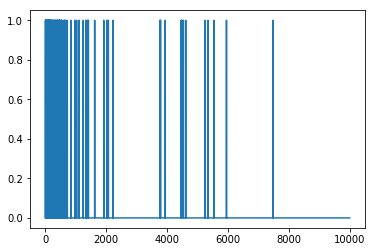

In [5]:
plt.plot(train_data[0])

# Create a baseline model

In [6]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works.
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

W0808 22:50:16.977222 12268 deprecation.py:506] From C:\Users\nguyen.pv162992\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow_core\python\ops\resource_variable_ops.py:1633: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
W0808 22:50:17.094137 12268 deprecation.py:323] From C:\Users\nguyen.pv162992\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow_core\python\ops\nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [7]:
baseline_history = baseline_model.fit(train_data,
                                     train_labels,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(test_data,test_labels),
                                     verbose=2)

W0808 23:00:41.840515 12268 deprecation.py:323] From C:\Users\nguyen.pv162992\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow_core\python\keras\optimizer_v2\optimizer_v2.py:468: BaseResourceVariable.constraint (from tensorflow.python.ops.resource_variable_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Apply a constraint manually following the optimizer update step.


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 7s - loss: 0.4651 - acc: 0.8109 - binary_crossentropy: 0.4651 - val_loss: 0.3203 - val_acc: 0.8794 - val_binary_crossentropy: 0.3203
Epoch 2/20
25000/25000 - 6s - loss: 0.2360 - acc: 0.9149 - binary_crossentropy: 0.2360 - val_loss: 0.2841 - val_acc: 0.8876 - val_binary_crossentropy: 0.2841
Epoch 3/20
25000/25000 - 6s - loss: 0.1732 - acc: 0.9400 - binary_crossentropy: 0.1732 - val_loss: 0.2986 - val_acc: 0.8811 - val_binary_crossentropy: 0.2986
Epoch 4/20
25000/25000 - 5s - loss: 0.1411 - acc: 0.9521 - binary_crossentropy: 0.1411 - val_loss: 0.3440 - val_acc: 0.8689 - val_binary_crossentropy: 0.3440
Epoch 5/20
25000/25000 - 6s - loss: 0.1165 - acc: 0.9619 - binary_crossentropy: 0.1165 - val_loss: 0.3483 - val_acc: 0.8734 - val_binary_crossentropy: 0.3483
Epoch 6/20
25000/25000 - 6s - loss: 0.0958 - acc: 0.9705 - binary_crossentropy: 0.0958 - val_loss: 0.3792 - val_acc: 0.8698 - val_binary_crossentropy: 0.3792
Ep

# Create a smaller model

In [8]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [9]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 7s - loss: 0.5707 - acc: 0.7678 - binary_crossentropy: 0.5707 - val_loss: 0.4676 - val_acc: 0.8375 - val_binary_crossentropy: 0.4676
Epoch 2/20
25000/25000 - 6s - loss: 0.3746 - acc: 0.8808 - binary_crossentropy: 0.3746 - val_loss: 0.3562 - val_acc: 0.8717 - val_binary_crossentropy: 0.3562
Epoch 3/20
25000/25000 - 6s - loss: 0.2816 - acc: 0.9067 - binary_crossentropy: 0.2816 - val_loss: 0.3129 - val_acc: 0.8804 - val_binary_crossentropy: 0.3129
Epoch 4/20
25000/25000 - 6s - loss: 0.2314 - acc: 0.9222 - binary_crossentropy: 0.2314 - val_loss: 0.2924 - val_acc: 0.8851 - val_binary_crossentropy: 0.2924
Epoch 5/20
25000/25000 - 6s - loss: 0.1984 - acc: 0.9345 - binary_crossentropy: 0.1984 - val_loss: 0.2849 - val_acc: 0.8868 - val_binary_crossentropy: 0.2849
Epoch 6/20
25000/25000 - 6s - loss: 0.1753 - acc: 0.9417 - binary_crossentropy: 0.1753 - val_loss: 0.2847 - val_acc: 0.8868 - val_binary_crossentropy: 0.2847
Ep

# Create a bigger model

In [10]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [11]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 15s - loss: 0.3478 - acc: 0.8518 - binary_crossentropy: 0.3478 - val_loss: 0.3219 - val_acc: 0.8664 - val_binary_crossentropy: 0.3219
Epoch 2/20
25000/25000 - 15s - loss: 0.1441 - acc: 0.9480 - binary_crossentropy: 0.1441 - val_loss: 0.3310 - val_acc: 0.8728 - val_binary_crossentropy: 0.3310
Epoch 3/20
25000/25000 - 15s - loss: 0.0463 - acc: 0.9868 - binary_crossentropy: 0.0463 - val_loss: 0.4329 - val_acc: 0.8689 - val_binary_crossentropy: 0.4329
Epoch 4/20
25000/25000 - 14s - loss: 0.0066 - acc: 0.9989 - binary_crossentropy: 0.0066 - val_loss: 0.5700 - val_acc: 0.8701 - val_binary_crossentropy: 0.5700
Epoch 5/20
25000/25000 - 14s - loss: 6.9676e-04 - acc: 1.0000 - binary_crossentropy: 6.9676e-04 - val_loss: 0.6744 - val_acc: 0.8699 - val_binary_crossentropy: 0.6744
Epoch 6/20
25000/25000 - 14s - loss: 2.0896e-04 - acc: 1.0000 - binary_crossentropy: 2.0896e-04 - val_loss: 0.7150 - val_acc: 0.8715 - val_binary_c

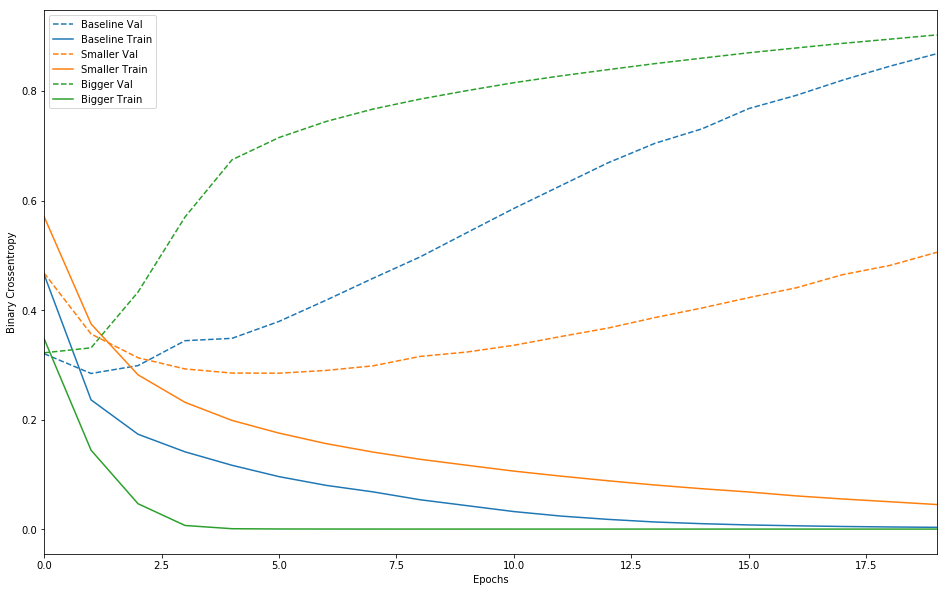

In [12]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [14]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                      activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                      activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy','binary_crossentropy'])


l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 8s - loss: 0.5081 - acc: 0.8130 - binary_crossentropy: 0.4674 - val_loss: 0.3719 - val_acc: 0.8788 - val_binary_crossentropy: 0.3290
Epoch 2/20
25000/25000 - 6s - loss: 0.2990 - acc: 0.9090 - binary_crossentropy: 0.2524 - val_loss: 0.3345 - val_acc: 0.8878 - val_binary_crossentropy: 0.2851
Epoch 3/20
25000/25000 - 6s - loss: 0.2505 - acc: 0.9300 - binary_crossentropy: 0.1989 - val_loss: 0.3363 - val_acc: 0.8858 - val_binary_crossentropy: 0.2832
Epoch 4/20
25000/25000 - 6s - loss: 0.2286 - acc: 0.9400 - binary_crossentropy: 0.1739 - val_loss: 0.3509 - val_acc: 0.8807 - val_binary_crossentropy: 0.2951
Epoch 5/20
25000/25000 - 6s - loss: 0.2135 - acc: 0.9474 - binary_crossentropy: 0.1567 - val_loss: 0.3624 - val_acc: 0.8780 - val_binary_crossentropy: 0.3047
Epoch 6/20
25000/25000 - 6s - loss: 0.2012 - acc: 0.9522 - binary_crossentropy: 0.1426 - val_loss: 0.3763 - val_acc: 0.8757 - val_binary_crossentropy: 0.3172
Ep

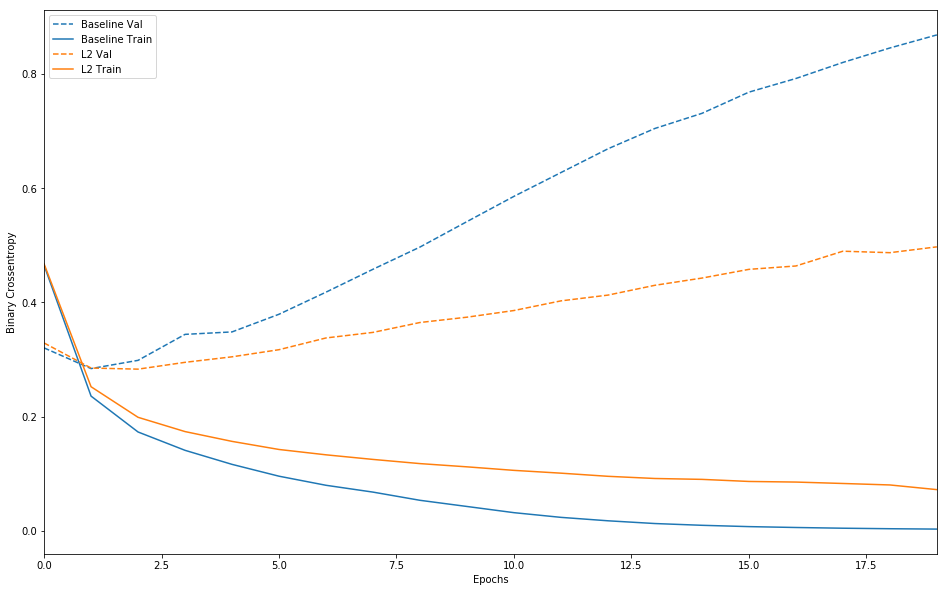

In [15]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [16]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 8s - loss: 0.6146 - acc: 0.6536 - binary_crossentropy: 0.6146 - val_loss: 0.4684 - val_acc: 0.8549 - val_binary_crossentropy: 0.4684
Epoch 2/20
25000/25000 - 6s - loss: 0.4292 - acc: 0.8318 - binary_crossentropy: 0.4292 - val_loss: 0.3282 - val_acc: 0.8810 - val_binary_crossentropy: 0.3282
Epoch 3/20
25000/25000 - 6s - loss: 0.3341 - acc: 0.8809 - binary_crossentropy: 0.3341 - val_loss: 0.2836 - val_acc: 0.8879 - val_binary_crossentropy: 0.2836
Epoch 4/20
25000/25000 - 6s - loss: 0.2764 - acc: 0.9059 - binary_crossentropy: 0.2764 - val_loss: 0.2740 - val_acc: 0.8894 - val_binary_crossentropy: 0.2740
Epoch 5/20
25000/25000 - 6s - loss: 0.2313 - acc: 0.9230 - binary_crossentropy: 0.2313 - val_loss: 0.2785 - val_acc: 0.8880 - val_binary_crossentropy: 0.2785
Epoch 6/20
25000/25000 - 6s - loss: 0.2065 - acc: 0.9356 - binary_crossentropy: 0.2065 - val_loss: 0.2964 - val_acc: 0.8850 - val_binary_crossentropy: 0.2964
Ep